$\qquad$ $\qquad$$\qquad$  **TDA 231 Machine Learning: Homework 0** <br />
$\qquad$ $\qquad$$\qquad$ **Goal: Introduction to Probability, Ipython Primer**<br />
$\qquad$ $\qquad$$\qquad$                   **Grader: Aristide, Mikael** <br />
$\qquad$ $\qquad$$\qquad$                     **Due Date: 26/3** <br />
$\qquad$ $\qquad$$\qquad$                   **Submitted by: Name, Personal no., email** <br />

General guidelines:
* All solutions to theoretical problems, can be submitted as a single file named *report.pdf*. They can also be submitted in this ipynb notebook, but equations wherever required, should be formatted using LaTeX math-mode.
* All discussion regarding practical problems, along with solutions and plots should be specified here itself. We will not generate the solutions/plots again by running your code.
* Your name, personal number and email address should be specified above and also in your file *report.pdf*.
* All datasets can be downloaded from the course website.
* All tables and other additional information should be included.

**Jupyter/IPython Notebook** is a collaborative Python web-based environment. This will be used in all our Homework Assignments except for Neural Network assignment which is be based on matlab. It is installed in the halls ES61-ES62, E-studio and MT9. You can also use google-colab: https://research.google.com/colaboratory/faq.html 
to run these notebooks without having to download, install, or do anything on your own computer other than a browser.
Some useful resources:
1. https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/ (Quick-start guide)
2. https://www.kdnuggets.com/2016/04/top-10-ipython-nb-tutorials.html
3. http://data-blog.udacity.com/posts/2016/10/latex-primer/ (latex-primer)
4. http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html (markdown)

# Practical problems

## [Plotting normal distributed points, 5 points]

Generate $1000$ points from 2D multivariate normal
distribution having mean $\mu = \left[
\begin{array}{c}
  1  \\
  1
\end{array}
\right]$ and covariance $\Sigma =
\left[
  \begin{array}{rr}
    0.1 & -0.05 \\
    -0.05&  0.2
  \end{array}
\right]
$.  Define the function $f({\bf x}, r) := \frac{({\bf x} - \mu)^{ \top } * \Sigma^{-1} *
  ({\bf x} - \mu) }{ 2} - r $. On a single plot, show the following:
* The level sets $f({\bf x}, r) = 0$ for $r=1, 2, 3$.
* Scatter plot of randomly generated points with points lying
outside $f({\bf x} , 3) = 0$ showing in black while points inside shown in
blue.
* Title of the plot showing how many points lie outside $f({\bf
    x}, 3) = 0$.
Submit your final plot as well as your implementation.

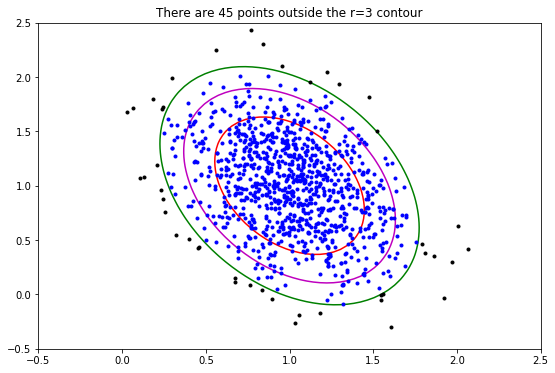

In [1]:
%matplotlib inline

import numpy as np
from numpy.linalg import inv
from numpy.random import multivariate_normal as mvnrnd
import matplotlib.pyplot as plt
#import seaborn as sns

#sns.set_style("whitegrid", {'legend.frameon': True, })
#sns.set(font_scale=1.3)

def f(x,mu,sigma,r):
    a = (x-mu).transpose() @ inv(sigma) @ (x-mu) / 2 - r
    return np.asscalar(a)

mu=np.matrix([[1],[1]])
sigma=np.matrix([[0.1, -0.05],[-0.05, 0.2]])

x = np.linspace(-1,3,100)
X,Y = np.meshgrid(x,x)

a = np.vectorize(lambda x,y,r:f([[x],[y]],mu,sigma,r))

fig=plt.figure(figsize=[9,6])
contour_colors = ('r','m','g')
for i,r in enumerate([1,2,3]):
    r_color = contour_colors[i]
    plt.contour(X,Y,a(X,Y,r),0,colors=r_color)
    
#plt.figure(2)
#plt.contour(X,Y,a(X,Y,3),[-2,-1,0],colors=contour_colors)

rnd_points = mvnrnd(np.squeeze(np.asarray(mu)),sigma,1000)

outside_points = []
inside_points = []

for point in rnd_points:
    if a(point[0],point[1],3) > 0:
        outside_points.append(point)
    else:
        inside_points.append(point)
        
inside_points = np.squeeze(inside_points)
outside_points = np.squeeze(outside_points)
#plt.style.use('ggplot')
plt.plot(outside_points[:,0],outside_points[:,1],marker='o',color='black',linestyle='none',markersize=3)
plt.plot(inside_points[:,0],inside_points[:,1],marker='o',color='b',linestyle='none',markersize=3)
plt.axis([-0.5,2.5,-0.5,2.5]);
plt.title('There are '+str(len(outside_points))+' points outside the r=3 contour');


## [Covariance and correlation, 5 points]
Load dataset0.txt ($X$) containing 1074 data points
each having 12 features related to US schools. Compute the covariance
and correlation matrix for $X$. Scale each feature
in $X$ between $[0, 1]$ to obtain a new dataset $Y$. Compute the
covariance and correlation matrices for $X$ and $Y$, and plot them (e.g. as colormaps).
What do you observe? Show a scatter plot of the pair of features in $Y$ having minimum
correlation, indicating in the title the feature indices and the
correlation value. Submit the plots, comments and your implementation.

7 11


Text(0.5,1,'Correlation between feature 7 and feature 11 is 0.038')

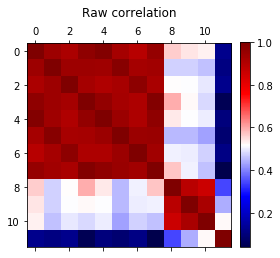

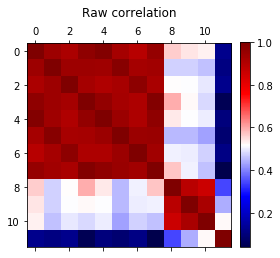

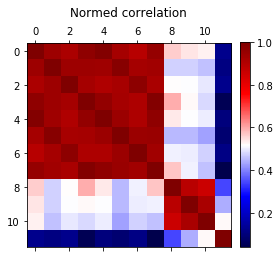

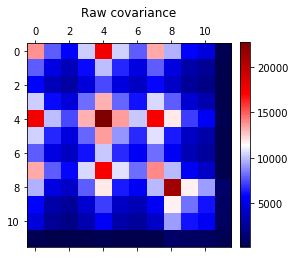

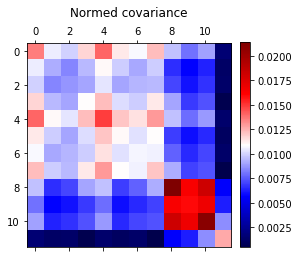

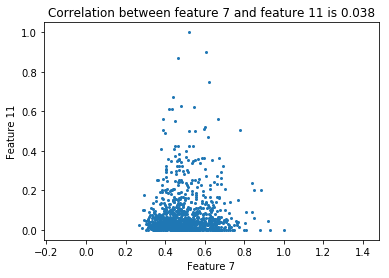

In [85]:

data = np.loadtxt("dataset0.txt")

normed_data = (data / data.max(0)).transpose()

corr = np.corrcoef(normed_data)

def plotty(title, data):
    im = plt.matshow(data,cmap='seismic')
    plt.colorbar(im, fraction=0.046, pad=0.04)
    plt.title(title, y=1.1)
    
args = [('Raw correlation', np.corrcoef(data.transpose())),
        ('Raw correlation', np.corrcoef(data.transpose())),
        ('Normed correlation', np.corrcoef(normed_data)),
        ('Raw covariance', np.cov(data.transpose())),
        ('Normed covariance', np.cov(normed_data))]
for title, data in args:
    plotty(title, data)

        
ind0 = np.mod(np.argmin(np.abs(corr)),12)
ind1 = int(np.floor(np.argmin(np.abs(corr))/12))
print(ind0,ind1)
plt.figure()
plt.axis('equal')
plt.xlabel('Feature {}'.format(ind0))
plt.ylabel('Feature {}'.format(ind1))
plt.plot(normed_data[ind0,:],normed_data[ind1,:],'.',markersize=4)
plt.title('Correlation between feature {} and feature {} is {:.3f}'.format(ind0, ind1, corr[ind0,ind1]))